**Importing Libraries and Data exploration:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
import tensorflow as tf
import datetime, os
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from glob import glob
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
%matplotlib inline

In [2]:
age_df = pd.read_csv("boneage-label.csv")

In [3]:
age_df.head()

id  boneage   male
0  1377      180  False
1  1378       12  False
2  1379       94  False
3  1380      120   True
4  1381       82  False

In [4]:
age_df.describe()

id       boneage
count  12611.000000  12611.000000
mean    8537.653001    127.320752
std     4108.763993     41.182021
min     1377.000000      1.000000
25%     5074.500000     96.000000
50%     8565.000000    132.000000
75%    12091.500000    156.000000
max    15610.000000    228.000000

In [5]:
base_bone_dir = os.path.join('/content/drive/MyDrive/boneage-dataset/')

In [6]:
age_df['path'] = age_df['id'].apply(lambda x: str(x)+'.png')

In [7]:
age_df.head()

id  boneage   male      path
0  1377      180  False  1377.png
1  1378       12  False  1378.png
2  1379       94  False  1379.png
3  1380      120   True  1380.png
4  1381       82  False  1381.png

In [8]:
age_df['file_path'] = age_df['path'].apply(lambda x: '/content/drive/MyDrive/boneage-dataset/' + str(x))
age_df.head()

id  boneage   male      path  \
0  1377      180  False  1377.png   
1  1378       12  False  1378.png   
2  1379       94  False  1379.png   
3  1380      120   True  1380.png   
4  1381       82  False  1381.png   

                                         file_path  
0  /content/drive/MyDrive/boneage-dataset/1377.png  
1  /content/drive/MyDrive/boneage-dataset/1378.png  
2  /content/drive/MyDrive/boneage-dataset/1379.png  
3  /content/drive/MyDrive/boneage-dataset/1380.png  
4  /content/drive/MyDrive/boneage-dataset/1381.png

male      6833
female    5778
Name: gender, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

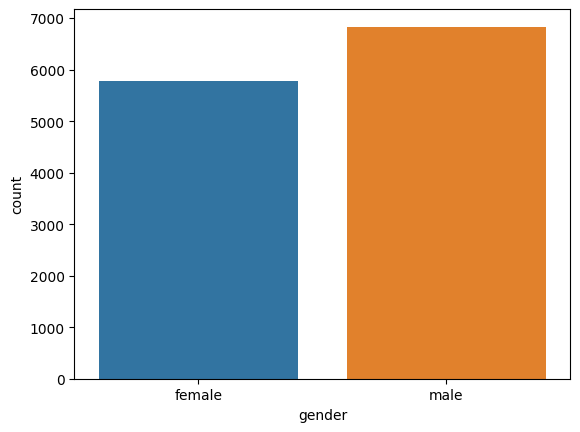

In [9]:
age_df['gender'] = age_df['male'].apply(lambda x: 'male' if x else 'female')
print(age_df['gender'].value_counts())
sns.countplot(x = age_df['gender'])

In [10]:
#oldest child in the dataset
print('MAX age: ' + str(age_df['boneage'].max()) + ' months')

#youngest child in the dataset
print('MIN age: ' + str(age_df['boneage'].min()) + ' months')

#mean age is
mean_bone_age = age_df['boneage'].mean()
print('mean: ' + str(mean_bone_age))

#median bone age
print('median: ' +str(age_df['boneage'].median()))

#standard deviation of boneage
std_bone_age = age_df['boneage'].std()

MAX age: 228 months
MIN age: 1 months
mean: 127.3207517246848
median: 132.0


In [11]:
#models perform better when features are normalised to have zero mean and unity standard deviation
#using z score for the training
age_df['bone_age_z'] = (age_df['boneage'] - mean_bone_age)/(std_bone_age)

print(age_df.head())

     id  boneage   male      path  \
0  1377      180  False  1377.png   
1  1378       12  False  1378.png   
2  1379       94  False  1379.png   
3  1380      120   True  1380.png   
4  1381       82  False  1381.png   

                                         file_path  gender  bone_age_z  
0  /content/drive/MyDrive/boneage-dataset/1377.png  female    1.279181  
1  /content/drive/MyDrive/boneage-dataset/1378.png  female   -2.800269  
2  /content/drive/MyDrive/boneage-dataset/1379.png  female   -0.809109  
3  /content/drive/MyDrive/boneage-dataset/1380.png    male   -0.177766  
4  /content/drive/MyDrive/boneage-dataset/1381.png  female   -1.100498  


Text(0.5, 1.0, 'Number of children in each age group')

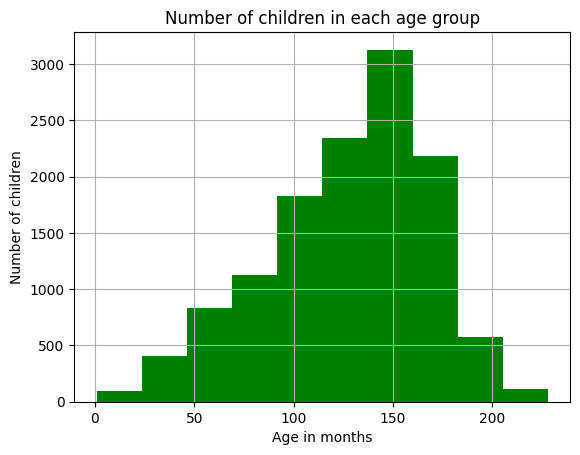

In [12]:
#plotting a histogram for bone ages
age_df['boneage'].hist(color = 'green')
plt.xlabel('Age in months')
plt.ylabel('Number of children')
plt.title('Number of children in each age group')

Text(0.5, 1.0, 'Relationship between number of children and bone age z score')

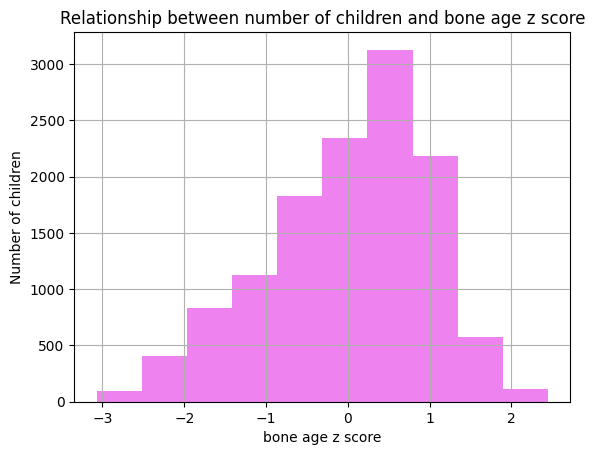

In [13]:
age_df['bone_age_z'].hist(color = 'violet')
plt.xlabel('bone age z score')
plt.ylabel('Number of children')
plt.title('Relationship between number of children and bone age z score')

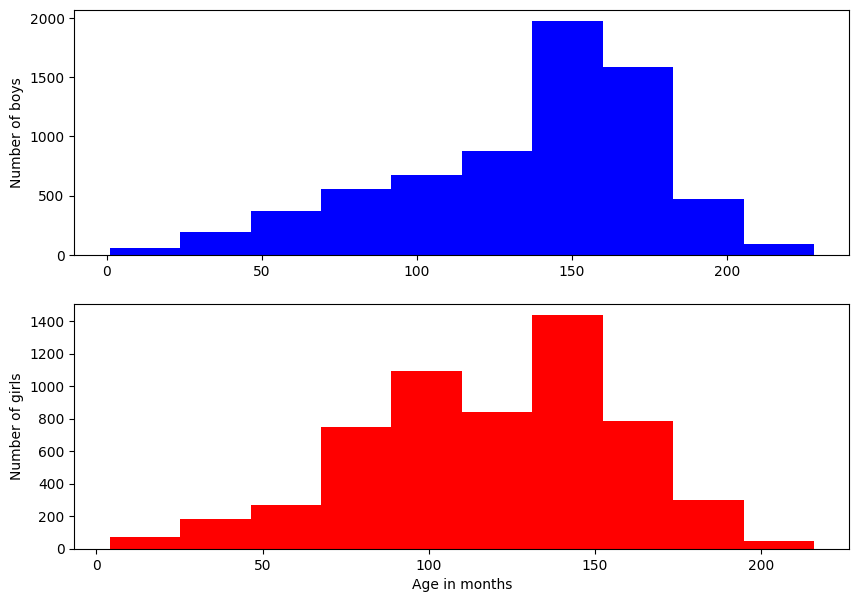

In [15]:
#distribution of age within each gender
male = age_df[age_df['gender'] == 'male']
female = age_df[age_df['gender'] == 'female']
fig, ax = plt.subplots(2,1)
ax[0].hist(male['boneage'], color = 'blue')
ax[0].set_ylabel('Number of boys')
ax[1].hist(female['boneage'], color = 'red')
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of girls')
fig.set_size_inches((10,7))

In [16]:
os.listdir()

['.config', 'drive', 'boneage-label.csv', 'sample_data']

In [17]:
age_df['exists'] = age_df['file_path'].map(os.path.exists)

In [18]:
print(str(sum([1 if i else 0 for i in age_df['exists']]))+" images found out of "+str(len(age_df['exists']))+" images.")
age_df = age_df[age_df.exists]

9981 images found out of 12611 images.


In [19]:
age_df['boneage_category'] = pd.cut(age_df['boneage'], 5)

In [20]:
age_df.head(30)

id  boneage   male      path  \
0   1377      180  False  1377.png   
1   1378       12  False  1378.png   
2   1379       94  False  1379.png   
3   1380      120   True  1380.png   
4   1381       82  False  1381.png   
5   1382      138   True  1382.png   
6   1383      150   True  1383.png   
7   1384      156   True  1384.png   
8   1385       36   True  1385.png   
9   1387      138   True  1387.png   
10  1388      126  False  1388.png   
11  1389      138   True  1389.png   
12  1390      156   True  1390.png   
13  1391      180   True  1391.png   
14  1393      132  False  1393.png   
15  1394       57   True  1394.png   
16  1395      120  False  1395.png   
17  1396      188  False  1396.png   
18  1398        4  False  1398.png   
19  1399       36  False  1399.png   
20  1400      132  False  1400.png   
21  1402       24  False  1402.png   
22  1403       60  False  1403.png   
23  1404      159  False  1404.png   
24  1405      120  False  1405.png   
25  1406      106  False  1406.png   
26  1407       30  False  1407.png   
27  1408      126   True  1408.png   
28  1409      149   True  1409.png   
29  1411       33  False  1411.png   

                                          file_path  gender  bone_age_z  \
0   /content/drive/MyDrive/boneage-dataset/1377.png  female    1.279181   
1   /content/drive/MyDrive/boneage-dataset/1378.png  female   -2.800269   
2   /content/drive/MyDrive/boneage-dataset/1379.png  female   -0.809109   
3   /content/drive/MyDrive/boneage-dataset/1380.png    male   -0.177766   
4   /content/drive/MyDrive/boneage-dataset/1381.png  female   -1.100498   
5   /content/drive/MyDrive/boneage-dataset/1382.png    male    0.259318   
6   /content/drive/MyDrive/boneage-dataset/1383.png    male    0.550708   
7   /content/drive/MyDrive/boneage-dataset/1384.png    male    0.696402   
8   /content/drive/MyDrive/boneage-dataset/1385.png    male   -2.217491   
9   /content/drive/MyDrive/boneage-dataset/1387.png    male    0.259318   
10  /content/drive/MyDrive/boneage-dataset/1388.png  female   -0.032071   
11  /content/drive/MyDrive/boneage-dataset/1389.png    male    0.259318   
12  /content/drive/MyDrive/boneage-dataset/1390.png    male    0.696402   
13  /content/drive/MyDrive/boneage-dataset/1391.png    male    1.279181   
14  /content/drive/MyDrive/boneage-dataset/1393.png  female    0.113624   
15  /content/drive/MyDrive/boneage-dataset/1394.png    male   -1.707559   
16  /content/drive/MyDrive/boneage-dataset/1395.png  female   -0.177766   
17  /content/drive/MyDrive/boneage-dataset/1396.png  female    1.473440   
18  /content/drive/MyDrive/boneage-dataset/1398.png  female   -2.994529   
19  /content/drive/MyDrive/boneage-dataset/1399.png  female   -2.217491   
20  /content/drive/MyDrive/boneage-dataset/1400.png  female    0.113624   
21  /content/drive/MyDrive/boneage-dataset/1402.png  female   -2.508880   
22  /content/drive/MyDrive/boneage-dataset/1403.png  female   -1.634712   
23  /content/drive/MyDrive/boneage-dataset/1404.png  female    0.769249   
24  /content/drive/MyDrive/boneage-dataset/1405.png  female   -0.177766   
25  /content/drive/MyDrive/boneage-dataset/1406.png  female   -0.517720   
26  /content/drive/MyDrive/boneage-dataset/1407.png  female   -2.363185   
27  /content/drive/MyDrive/boneage-dataset/1408.png    male   -0.032071   
28  /content/drive/MyDrive/boneage-dataset/1409.png    male    0.526425   
29  /content/drive/MyDrive/boneage-dataset/1411.png  female   -2.290338   

    exists boneage_category  
0     True   (137.2, 182.6]  
1     True    (0.773, 46.4]  
2     True    (91.8, 137.2]  
3     True    (91.8, 137.2]  
4     True     (46.4, 91.8]  
5     True   (137.2, 182.6]  
6     True   (137.2, 182.6]  
7     True   (137.2, 182.6]  
8     True    (0.773, 46.4]  
9     True   (137.2, 182.6]  
10    True    (91.8, 137.2]  
11    True   (137.2, 182.6]  
12    True   (137.2, 182.6]  
13    True   (137.2, 182.6]  
14    True    (91.8, 137.2]  
15    True     (46.4,

*Deleting the missing images from the dataset:*

In [21]:
age_df.dropna(inplace=True)

In [22]:
age_df.shape

(9981, 9)

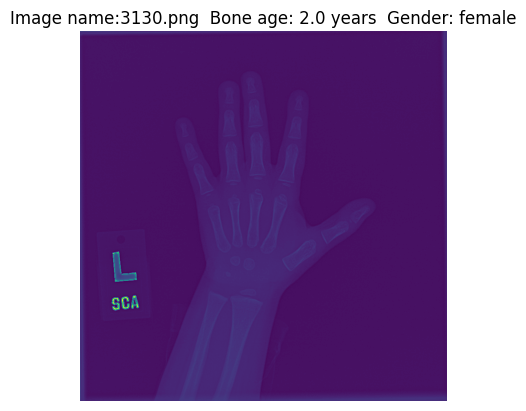

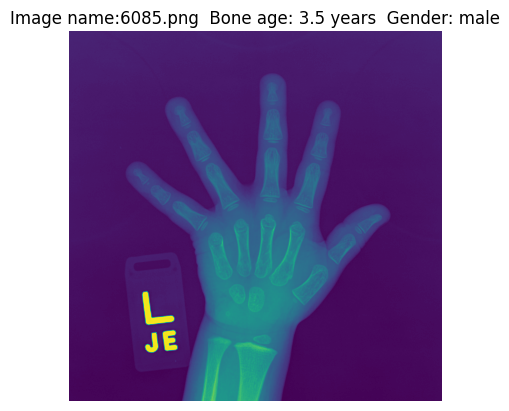

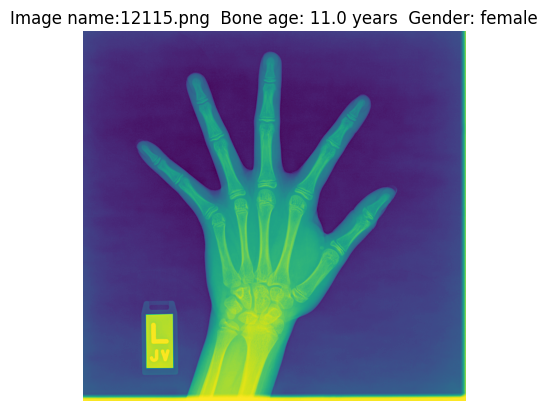

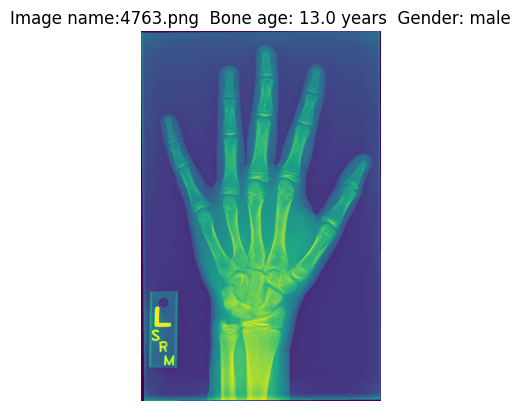

In [ ]:
#looking at some sample images:
import matplotlib.image as mpimg
for filename, boneage, gender in age_df[['path','boneage','gender']].sample(4).values:
    img = mpimg.imread('/content/drive/MyDrive/boneage-dataset/'+ filename)
    plt.imshow(img)
    plt.title('Image name:{}  Bone age: {} years  Gender: {}'.format(filename, boneage/12, gender))
    plt.axis('off')
    plt.show()

*Splitting Dataset into Training, Validation and Test sets:*

In [ ]:
age_df_train, age_df_test  = train_test_split(age_df, test_size = 0.2, random_state = 0)

In [ ]:
train, valid = train_test_split(age_df_train, test_size = 0.2, random_state = 0)

*Image Preprocessing using ImageDataGenerator:*

In [23]:
#library required for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  keras.applications.xception import preprocess_input

#reducing down the size of the image
img_size = 256

train_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
train.shape

(6387, 9)

In [ ]:
valid.shape

(1597, 9)

In [ ]:
#train data generator
train_generator = train_data_generator.flow_from_dataframe(
    dataframe = train,
    directory = '/content/drive/MyDrive/boneage-dataset/',
    x_col= 'path',
    y_col= 'gender',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode= 'binary',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 6387 validated image filenames belonging to 2 classes.


In [ ]:
#validation data generator
val_generator = val_data_generator.flow_from_dataframe(
    dataframe = valid,
    directory = '/content/drive/MyDrive/boneage-dataset/',
    x_col= 'path',
    y_col= 'gender',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'binary',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 1597 validated image filenames belonging to 2 classes.


In [ ]:
#test data generator
test_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_data_generator.flow_from_dataframe(
    dataframe = age_df_test,
    directory = '/content/drive/MyDrive/boneage-dataset/',
    x_col= 'path',
    y_col= 'gender',
    shuffle = True,
    class_mode = 'binary',
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 1997 validated image filenames belonging to 2 classes.


In [ ]:
labels = train['gender'].tolist()

In [ ]:
test_X, test_Y = next(val_data_generator.flow_from_dataframe(
                            valid,
                            directory = '/content/drive/MyDrive/boneage-dataset/',
                            x_col = 'path',
                            y_col = 'gender',
                            target_size = (img_size,img_size),
                            batch_size = 1598,
                            class_mode = 'binary'
                            ))

Found 1597 validated image filenames belonging to 2 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = tf.keras.models.Sequential([
    # 1st convolutional and max pooling layer + input layer
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu", input_shape = (img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolutional and max pooling layer
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 3rd convolutional and max pooling layer
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 4th convolutional and max pooling layer
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten layer
    tf.keras.layers.Flatten(),
    # 1st fully connected layer
    tf.keras.layers.Dense(units = 512, activation = "relu"),
    # output layer
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")])

model.compile(optimizer = RMSprop(learning_rate = +1e-3),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.summary()

history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 30,
                    validation_data = val_generator,
                    validation_steps = 50,
                    verbose = 2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
model.save('binaryclassification_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights("weights_epoch_BC_1.h5")

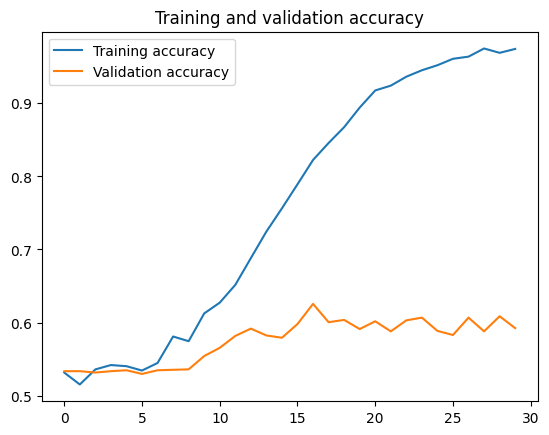

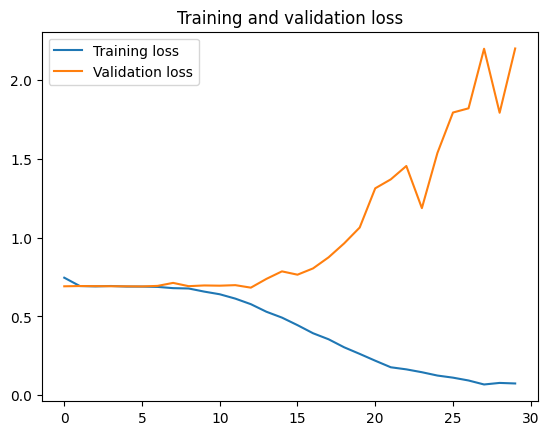

In [ ]:
#evaluation of Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From the graph above it can be said that the accuracy can still be improved for binary classification by:
1) Increasing number of epochs
2) Applying Early Stopping for stopping at the epoch giving peak accuracy

In [ ]:
model = tf.keras.models.load_model("binaryclassification_1.h5")

In [ ]:
y_pred = model.predict(test_generator)

63/63 [==============================] - 129s 2s/step


In [ ]:
y_pred[:10]

array([[9.9972624e-01],
       [1.1910843e-01],
       [5.3016752e-01],
       [6.8227363e-01],
       [9.9937284e-01],
       [9.6995747e-01],
       [1.7827895e-04],
       [9.9999851e-01],
       [9.9832201e-01],
       [9.9989849e-01]], dtype=float32)

In [ ]:
score = model.evaluate(test_generator)

63/63 [==============================] - 124s 2s/step - loss: 1.7883 - accuracy: 0.6309


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

In [ ]:
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : female
1 : male


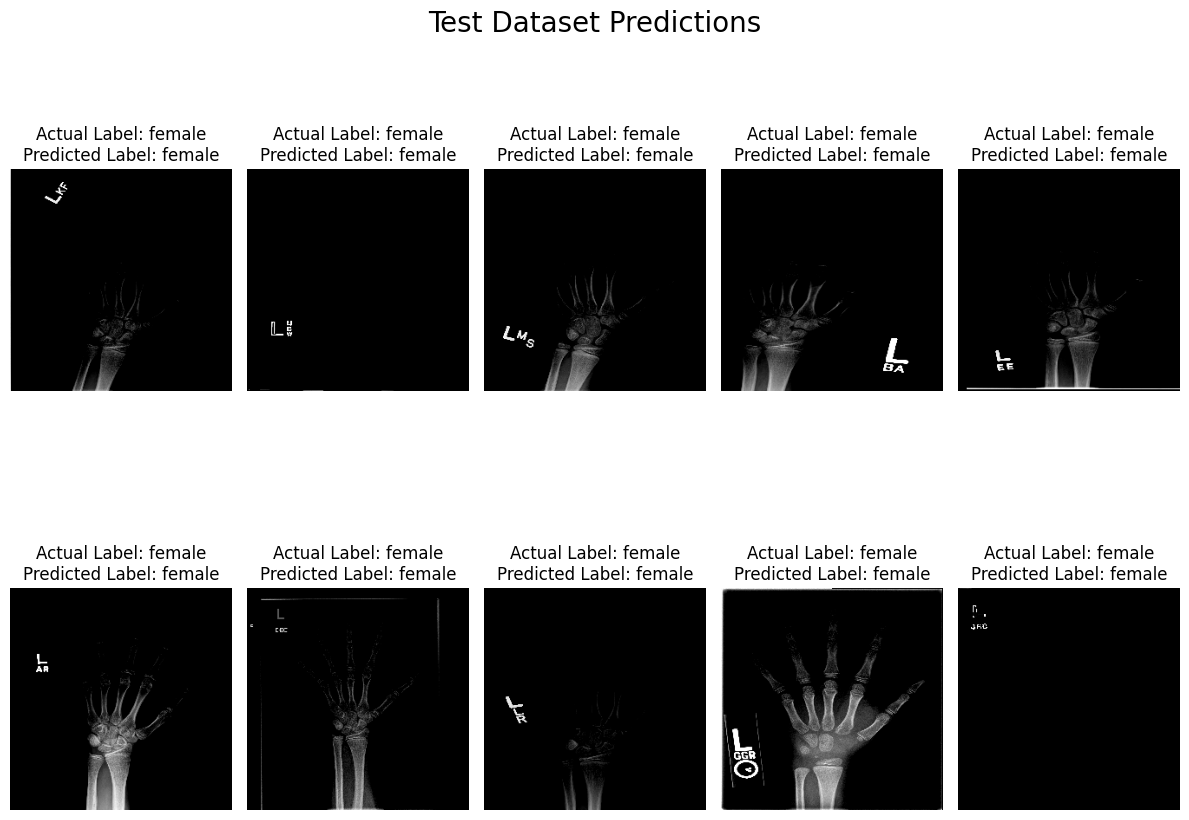

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(test_X[0][1][idx])]
        predicted_label = labels[np.argmax(y_pred[idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].set_title(f"Actual Label: {label}\nPredicted Label: {predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

**Testing on some images:**

1/1 [==============================] - 0s 117ms/step
female


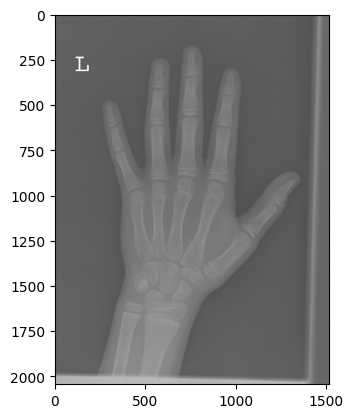

In [ ]:
from keras.preprocessing import image
from keras.models import Model

def prepare_image(file):
  img_path = "/content/drive/MyDrive/boneage-dataset/"
  img = image.load_img(img_path + file, target_size = (img_size,img_size))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
  return img_array_expanded_dims

mod = keras.models.load_model("binaryclassification_1.h5")
preprocessed_image = prepare_image('1408.png')
imge = image.load_img("/content/drive/MyDrive/boneage-dataset/1408.png")
plt.imshow(imge)
predictions = mod.predict(preprocessed_image)
result = np.argmax(predictions)

if result == 0:
  print ("female")

elif result == 1:
  print ("male")

else:
  print("cannot identify")


**Applying Early Stopping:**

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience= 5,
                              verbose=0, mode='auto')

In [ ]:
#model checkpoint
mc = ModelCheckpoint('binaryclassification_1.h5', monitor='val_loss', mode='min', save_best_only=True)

#reduce lr on plateau
red_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

callbacks = [early_stopping]


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model_2 = tf.keras.models.Sequential([
    # 1st convolutional and max pooling layer + input layer
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu", input_shape = (img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolutional and max pooling layer
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 3rd convolutional and max pooling layer
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 4th convolutional and max pooling layer
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten layer
    tf.keras.layers.Flatten(),
    # 1st fully connected layer
    tf.keras.layers.Dense(units = 512, activation = "relu"),
    # output layer
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")])

model_2.compile(optimizer = RMSprop(learning_rate = +1e-3),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model_2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)       

In [ ]:
#fit model
history_2 = model_2.fit_generator(train_generator,
                            steps_per_epoch = 30,
                            validation_data = val_generator,
                            validation_steps = 1,
                            epochs = 50,
                            callbacks= callbacks)
history_2

<ipython-input-49-d45343d52411>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(train_generator,


Epoch 1/50
30/30 [==============================] - 102s 3s/step - loss: 0.6003 - accuracy: 0.6646 - val_loss: 0.7552 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/50
30/30 [==============================] - 99s 3s/step - loss: 0.5893 - accuracy: 0.6865 - val_loss: 0.6975 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
30/30 [==============================] - 98s 3s/step - loss: 0.5844 - accuracy: 0.6896 - val_loss: 0.7960 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/50
30/30 [==============================] - 102s 3s/step - loss: 0.5659 - accuracy: 0.7042 - val_loss: 0.8132 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 5/50
30/30 [==============================] - 114s 4s/step - loss: 0.5433 - accuracy: 0.7188 - val_loss: 0.6876 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 6/50
30/30 [==============================] - 102s 3s/step - loss: 0.5572 - accuracy: 0.7083 - val_loss: 0.7827 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 7/50
30/30 [==============================] - 101s 3s/step - loss: 0.502

In [ ]:
model_2.save('binaryclassification_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_2.save_weights("weights_epoch_BC_2.h5")

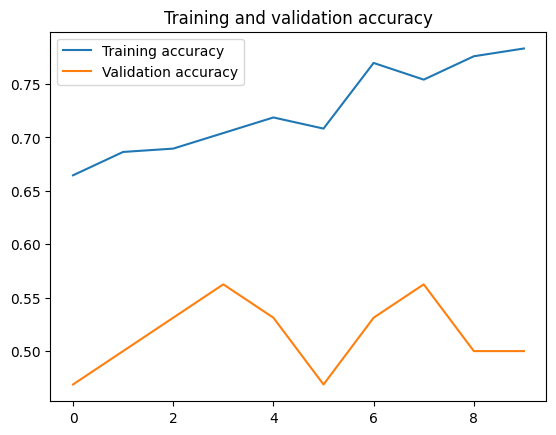

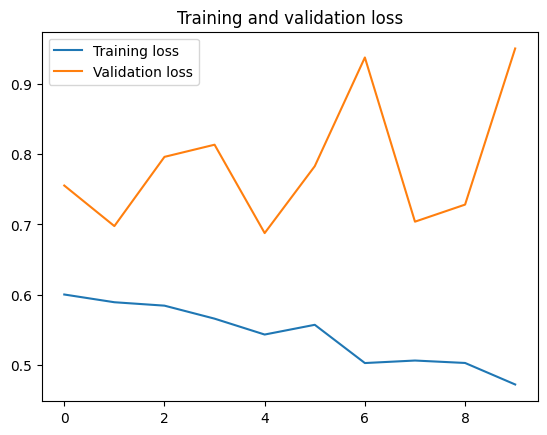

In [ ]:
#evaluation of Model_2
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_2 = tf.keras.models.load_model("binaryclassification_2.h5")

In [ ]:
y_pred_2 = model_2.predict(test_generator)

63/63 [==============================] - 125s 2s/step


In [ ]:
score_2 = model_2.evaluate(test_generator)

63/63 [==============================] - 116s 2s/step - loss: 0.7797 - accuracy: 0.5909


In [ ]:
labels_1 = {value: key for key, value in test_generator.class_indices.items()}

In [ ]:
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels_1.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : female
1 : male


1/1 [==============================] - 0s 147ms/step
female


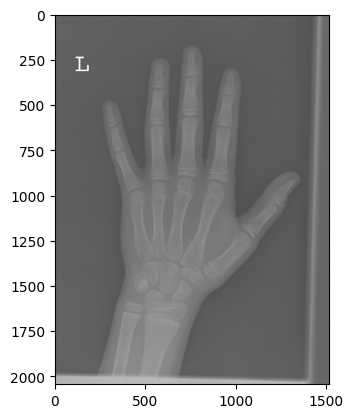

In [ ]:
from tensorflow.python.ops.gen_nn_ops import max_pool_grad_grad_v2
from keras.preprocessing import image
from keras.models import Model

def prepare_image(file):
  img_path = "/content/drive/MyDrive/boneage-dataset/"
  img = image.load_img(img_path + file, target_size = (img_size,img_size))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis = 0)
  return img_array_expanded_dims

mod_2 = keras.models.load_model("binaryclassification_2.h5")
preprocessed_image = prepare_image('1408.png')
imge = image.load_img("/content/drive/MyDrive/boneage-dataset/1408.png")
plt.imshow(imge)
predictions = mod_2.predict(preprocessed_image)
result = np.argmax(predictions)

if result == 0:
  print ("female")

elif result == 1:
  print ("male")

else:
  print("cannot identify")

**Multiclass Classification by diving bone ages into 5 divisions:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
import tensorflow as tf
import datetime, os
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from glob import glob
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
%matplotlib inline

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
for i in age_df.columns:
    print(i, age_df[i].unique())

id [ 1377  1378  1379 ... 15608 15609 15610]
boneage [180  12  94 120  82 138 150 156  36 126 132  57 188   4  24  60 159 106
  30 149  33  78  88 162  32  54 174 144  27 170 113 108 136 165  42  21
  69  50  90 192  84  96 216 140 100  72 168  48 139 186  13 135 146 189
  51 102 134  39  64 104 129 147  14  45  28 128  18  86 153 110 210  55
 222  66 198 200 109  80   9 114 112 204 148 154  58  67 116 118 101 111
 124  56 130 158 228 123  38  29 164 137 117  15 172 184 143  76 169 121
 214 115  75 166  17  34 151 163 194 177 125  74  81  91  87 105 183 152
  16 176 133 141 173 196 160 197 171 167  20  62 212   1  49  10  63  52
 182 142 179   6  70  93  46 107 206  65  37 161 103  77  40  43]
male [False  True]
path ['1377.png' '1378.png' '1379.png' ... '15608.png' '15609.png' '15610.png']
file_path ['/content/drive/MyDrive/boneage-dataset/1377.png'
 '/content/drive/MyDrive/boneage-dataset/1378.png'
 '/content/drive/MyDrive/boneage-dataset/1379.png' ...
 '/content/drive/MyDrive/boneag

In [ ]:
age_df['boneage_category'] = age_df['boneage_category'].astype('string')

In [ ]:
print (age_df.dtypes)

id                    int64
boneage               int64
male                   bool
path                 object
file_path            object
gender               object
bone_age_z          float64
exists                 bool
boneage_category     string
dtype: object


In [ ]:
age_df_train_2, age_df_test_2  = train_test_split(age_df, test_size = 0.2, random_state = 0)

In [ ]:
#splitting train dataframe into training and validation dataframes
train_2, valid_2 = train_test_split(age_df_train_2, test_size = 0.2, random_state = 0)

In [ ]:
#train data generator
train_generator_2 = train_data_generator.flow_from_dataframe(
    dataframe = train_2,
    directory = '/content/drive/MyDrive/boneage-dataset/',
    x_col= 'path',
    y_col= 'boneage_category',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode= 'categorical',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 6387 validated image filenames belonging to 5 classes.


In [ ]:
#validation data generator
val_generator_2 = val_data_generator.flow_from_dataframe(
    dataframe = valid_2,
    directory = '/content/drive/MyDrive/boneage-dataset/',
    x_col= 'path',
    y_col= 'boneage_category',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 1597 validated image filenames belonging to 5 classes.


In [ ]:
#test data generator
test_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator_2 = test_data_generator.flow_from_dataframe(
    dataframe = age_df_test_2,
    directory = '/content/drive/MyDrive/boneage-dataset/',
    x_col= 'path',
    y_col= 'boneage_category',
    shuffle = True,
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = (img_size,img_size))

Found 1997 validated image filenames belonging to 5 classes.


In [ ]:
test_X_2, test_Y_2= next(test_data_generator.flow_from_dataframe(
                            age_df_test_2,
                            directory = '/content/drive/MyDrive/boneage-dataset/',
                            x_col = 'path',
                            y_col = 'boneage_category',
                            target_size = (img_size,img_size),
                            batch_size = 1997,
                            class_mode = 'categorical'
                            ))

Found 1997 validated image filenames belonging to 5 classes.


In [ ]:
labels_2 = {value: key for key, value in train_generator_2.class_indices.items()}

In [ ]:
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels_2.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : (0.773, 46.4]
1 : (137.2, 182.6]
2 : (182.6, 228.0]
3 : (46.4, 91.8]
4 : (91.8, 137.2]


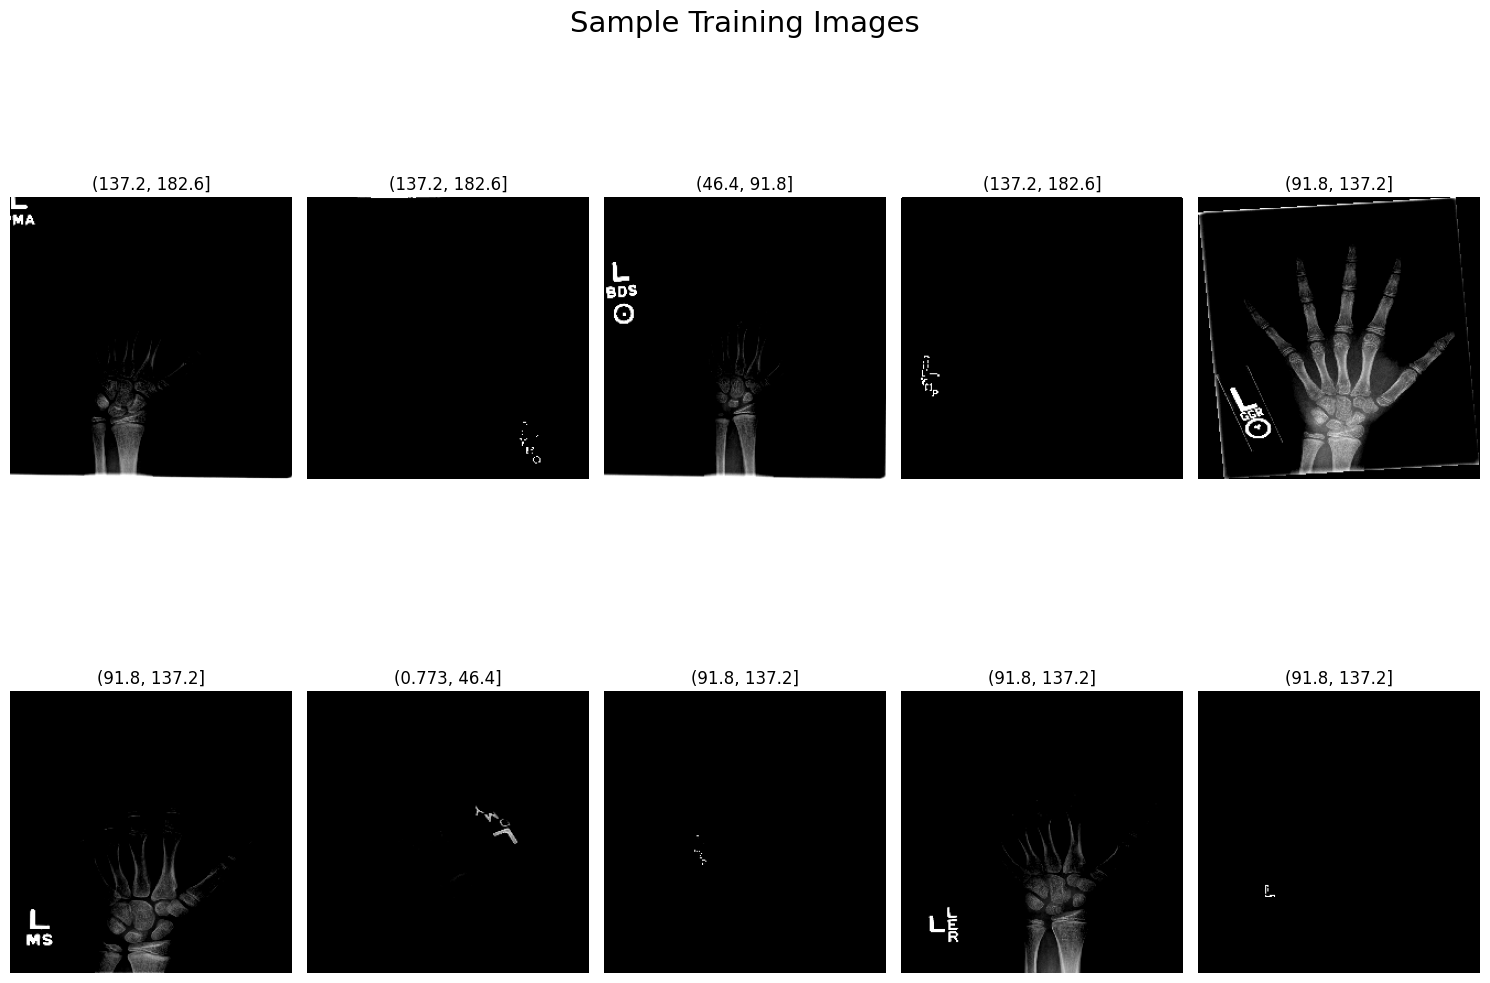

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels_2[np.argmax(train_generator_2[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator_2[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
from tensorflow.keras.regularizers import l2

def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(img_size, img_size, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=5, activation='softmax')
    ])

    return model

In [ ]:
mc_model_1 = create_model()

In [ ]:
mc_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 128)     9728      
                                                                 
 activation (Activation)     (None, 252, 252, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 124, 124, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
optimizer = 'Adam'

In [ ]:
mc_model_1.compile(optimizer = optimizer, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [ ]:
history_3 = mc_model_1.fit(train_generator_2, epochs=10, validation_data = val_generator_2,
                       callbacks = reduce_lr
                       )

Epoch 1/10
200/200 [==============================] - 2879s 14s/step - loss: 1.4029 - accuracy: 0.3980 - val_loss: 1.2612 - val_accuracy: 0.4415 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - 312s 2s/step - loss: 1.2496 - accuracy: 0.4652 - val_loss: 1.1586 - val_accuracy: 0.4953 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - 308s 2s/step - loss: 1.1488 - accuracy: 0.5104 - val_loss: 1.1582 - val_accuracy: 0.5135 - lr: 0.0010
Epoch 4/10
200/200 [==============================] - 328s 2s/step - loss: 1.0471 - accuracy: 0.5594 - val_loss: 1.1317 - val_accuracy: 0.5235 - lr: 0.0010
Epoch 5/10
200/200 [==============================] - 305s 2s/step - loss: 0.8971 - accuracy: 0.6255 - val_loss: 1.1549 - val_accuracy: 0.5291 - lr: 0.0010
Epoch 6/10
200/200 [==============================] - 306s 2s/step - loss: 0.7322 - accuracy: 0.7041 - val_loss: 1.2225 - val_accuracy: 0.5191 - lr: 0.0010
Epoch 7/10
200/200 [==============================] - 304s 2s/

In [ ]:
mc_model_1.save('multiclass_classification_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mc_model_1.save_weights("weights_epoch_MC_1.h5")

In [ ]:
mc_model_1 = tf.keras.models.load_model("multiclass_classification_1.h5")

In [ ]:
y_pred_3 = mc_model_1.predict(test_X_2)

63/63 [==============================] - 213s 3s/step


In [ ]:
y_pred_3[:10]

array([[1.3479664e-06, 9.0279412e-01, 1.3419675e-03, 3.5808224e-04,
        9.5504455e-02],
       [8.7813356e-14, 9.6008295e-01, 3.9877415e-02, 1.0203188e-10,
        3.9667491e-05],
       [2.4781777e-03, 9.9149609e-01, 3.1919131e-04, 1.2688523e-03,
        4.4376375e-03],
       [6.6405788e-05, 9.9253953e-01, 1.3186483e-04, 1.7763875e-04,
        7.0846626e-03],
       [9.5554435e-07, 8.8302404e-01, 4.1057087e-02, 1.2582562e-04,
        7.5792052e-02],
       [1.6291868e-02, 5.2824175e-01, 2.5586434e-02, 3.0641187e-02,
        3.9923868e-01],
       [3.1042974e-10, 6.2597919e-01, 1.1775745e-02, 1.2577917e-06,
        3.6224386e-01],
       [3.7679493e-07, 4.9652100e-09, 1.1812449e-17, 6.2426175e-03,
        9.9375701e-01],
       [1.4391400e-04, 1.5082682e-07, 2.5481857e-13, 9.9698496e-01,
        2.8708866e-03],
       [1.5372157e-02, 6.3524973e-03, 2.0482745e-05, 8.2546967e-01,
        1.5278503e-01]], dtype=float32)

In [ ]:
#Label Mappings for classes present in the training and validation datasets

#0 : (0.773, 46.4]
#1 : (137.2, 182.6]
#2 : (182.6, 228.0]
#3 : (46.4, 91.8]
#4 : (91.8, 137.2]
for i in range(10):
  predicted_label_3 = labels_2[np.argmax(y_pred_3[i])]
  print(predicted_label_3)


(137.2, 182.6]
(137.2, 182.6]
(137.2, 182.6]
(137.2, 182.6]
(137.2, 182.6]
(137.2, 182.6]
(137.2, 182.6]
(91.8, 137.2]
(46.4, 91.8]
(46.4, 91.8]


In [ ]:
test_Y_2[:10]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
mc_score = mc_model_1.evaluate(test_generator_2)

63/63 [==============================] - 261s 4s/step - loss: 2.1820 - accuracy: 0.4852


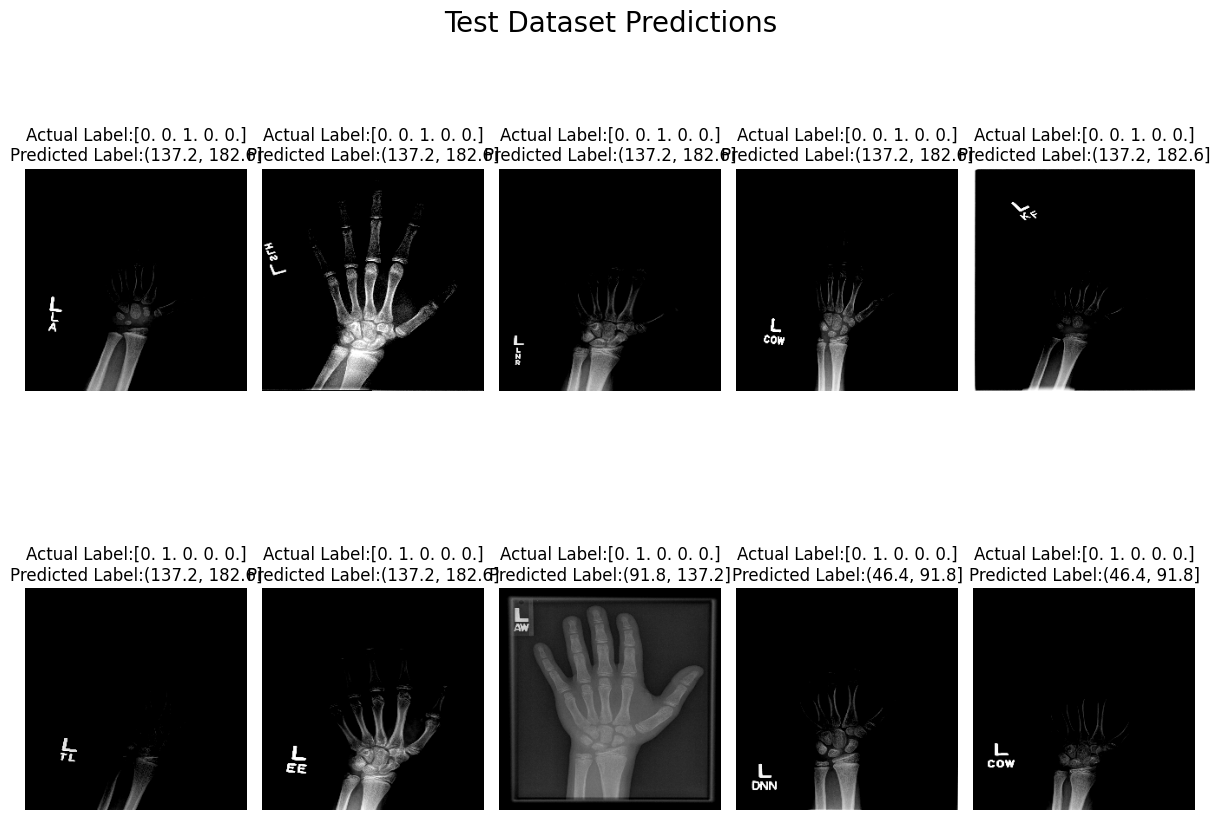

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels_2[np.argmax(y_pred_3[idx])]
        ax[i, j].set_title(f"Actual Label:{test_Y_2[i]}\nPredicted Label:{predicted_label}")
        ax[i, j].imshow(test_generator_2[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

**Regression models for predicting boneage:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
import tensorflow as tf
import datetime, os
import math
import seaborn as sns
import os
from glob import glob
%matplotlib inline

In [ ]:
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.applications.mobilenet import MobileNet
from keras.layers import Resizing
from keras.applications.vgg19 import VGG19

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
import cv2

In [ ]:
from PIL import Image

In [ ]:
from keras.layers import Input, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
age_df_6 = pd.read_csv("boneage-label.csv")
age_df_6

id  boneage   male
0       1377      180  False
1       1378       12  False
2       1379       94  False
3       1380      120   True
4       1381       82  False
...      ...      ...    ...
12606  15605       50  False
12607  15606      113  False
12608  15608       55  False
12609  15609      150   True
12610  15610      132   True

[12611 rows x 3 columns]

In [ ]:
base_dir = '/content/drive/MyDrive/boneage-dataset/'

In [ ]:
age_dir = os.listdir(base_dir)

In [ ]:
print(len(age_dir))

9981


In [ ]:
age_dir[:10]

['5986.png',
 '5961.png',
 '5969.png',
 '5977.png',
 '5987.png',
 '5964.png',
 '5970.png',
 '5966.png',
 '5955.png',
 '5962.png']

In [ ]:
age_df_6[age_df_6['id']==5962]

id  boneage   male
3959  5962       94  False

In [ ]:
age_df_6.head()

id  boneage   male
0  1377      180  False
1  1378       12  False
2  1379       94  False
3  1380      120   True
4  1381       82  False

In [ ]:
age_id = age_df_6['id'].to_list()

In [ ]:
age_df_6['Image Path'] = [f"{str(i)}.png" for i in age_id]

In [ ]:
age_df_6

id  boneage   male Image Path
0       1377      180  False   1377.png
1       1378       12  False   1378.png
2       1379       94  False   1379.png
3       1380      120   True   1380.png
4       1381       82  False   1381.png
...      ...      ...    ...        ...
12606  15605       50  False  15605.png
12607  15606      113  False  15606.png
12608  15608       55  False  15608.png
12609  15609      150   True  15609.png
12610  15610      132   True  15610.png

[12611 rows x 4 columns]

In [ ]:
age_df_6.columns = ['id','boneage', 'Sex', 'Image Path']

In [ ]:
age_df_6.head()

id  boneage    Sex Image Path
0  1377      180  False   1377.png
1  1378       12  False   1378.png
2  1379       94  False   1379.png
3  1380      120   True   1380.png
4  1381       82  False   1381.png

In [ ]:
age_df_6['Sex'].value_counts()

True     6833
False    5778
Name: Sex, dtype: int64

In [ ]:
# True - Male  or  M - 1
# False - Female or F - 0
age_df_6['Sex'] = age_df_6['Sex'].replace({'False':0,'True':1})

In [ ]:
age_df_6['Sex'] = age_df_6['Sex'].astype(int)

In [ ]:
age_df_6.head()

id  boneage  Sex Image Path
0  1377      180    0   1377.png
1  1378       12    0   1378.png
2  1379       94    0   1379.png
3  1380      120    1   1380.png
4  1381       82    0   1381.png

In [ ]:
age_df_6['file_path'] = age_df_6['Image Path'].apply(lambda x: '/content/drive/MyDrive/boneage-dataset/' + str(x))
age_df_6.head()

id  boneage  Sex Image Path  \
0  1377      180    0   1377.png   
1  1378       12    0   1378.png   
2  1379       94    0   1379.png   
3  1380      120    1   1380.png   
4  1381       82    0   1381.png   

                                         file_path  
0  /content/drive/MyDrive/boneage-dataset/1377.png  
1  /content/drive/MyDrive/boneage-dataset/1378.png  
2  /content/drive/MyDrive/boneage-dataset/1379.png  
3  /content/drive/MyDrive/boneage-dataset/1380.png  
4  /content/drive/MyDrive/boneage-dataset/1381.png

In [ ]:
age_df_6['exists'] = age_df_6['file_path'].map(os.path.exists)

In [ ]:
print(str(sum([1 if i else 0 for i in age_df_6['exists']]))+" images found out of "+str(len(age_df_6['exists']))+" images.")
age_df_6 = age_df_6[age_df_6.exists]

9981 images found out of 12611 images.


In [ ]:
age_df_6.dropna(inplace=True)

<ipython-input-28-bc4090d262dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df_6.dropna(inplace=True)


In [ ]:
age_df_6

id  boneage  Sex Image Path  \
0       1377      180    0   1377.png   
1       1378       12    0   1378.png   
2       1379       94    0   1379.png   
3       1380      120    1   1380.png   
4       1381       82    0   1381.png   
...      ...      ...  ...        ...   
12606  15605       50    0  15605.png   
12607  15606      113    0  15606.png   
12608  15608       55    0  15608.png   
12609  15609      150    1  15609.png   
12610  15610      132    1  15610.png   

                                              file_path  exists  
0       /content/drive/MyDrive/boneage-dataset/1377.png    True  
1       /content/drive/MyDrive/boneage-dataset/1378.png    True  
2       /content/drive/MyDrive/boneage-dataset/1379.png    True  
3       /content/drive/MyDrive/boneage-dataset/1380.png    True  
4       /content/drive/MyDrive/boneage-dataset/1381.png    True  
...                                                 ...     ...  
12606  /content/drive/MyDrive/boneage-dataset/15605.png    True  
12607  /content/drive/MyDrive/boneage-dataset/15606.png    True  
12608  /content/drive/MyDrive/boneage-dataset/15608.png    True  
12609  /content/drive/MyDrive/boneage-dataset/15609.png    True  
12610  /content/drive/MyDrive/boneage-dataset/15610.png    True  

[9981 rows x 6 columns]

In [ ]:
boneage_df_6 = age_df_6[['id','boneage','Sex','Image Path']].copy()
boneage_df_6

id  boneage  Sex Image Path
0       1377      180    0   1377.png
1       1378       12    0   1378.png
2       1379       94    0   1379.png
3       1380      120    1   1380.png
4       1381       82    0   1381.png
...      ...      ...  ...        ...
12606  15605       50    0  15605.png
12607  15606      113    0  15606.png
12608  15608       55    0  15608.png
12609  15609      150    1  15609.png
12610  15610      132    1  15610.png

[9981 rows x 4 columns]

In [ ]:
age_data = []

for img in boneage_df_6['Image Path']:
    image = Image.open("/content/drive/MyDrive/boneage-dataset/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    age_data.append(image)

print(len(age_data))

9981


In [ ]:
x = np.array(age_data)
y = boneage_df_6['boneage'].values

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4990, 224, 224, 3)
(4991, 224, 224, 3)
(4990,)
(4991,)


In [ ]:
#x_tr = x_train[:3000]
x_ts = x_test[:400]

#y_tr = y_train[:3000]
y_ts = y_test[:400]

*Visualization of images in dataset:*

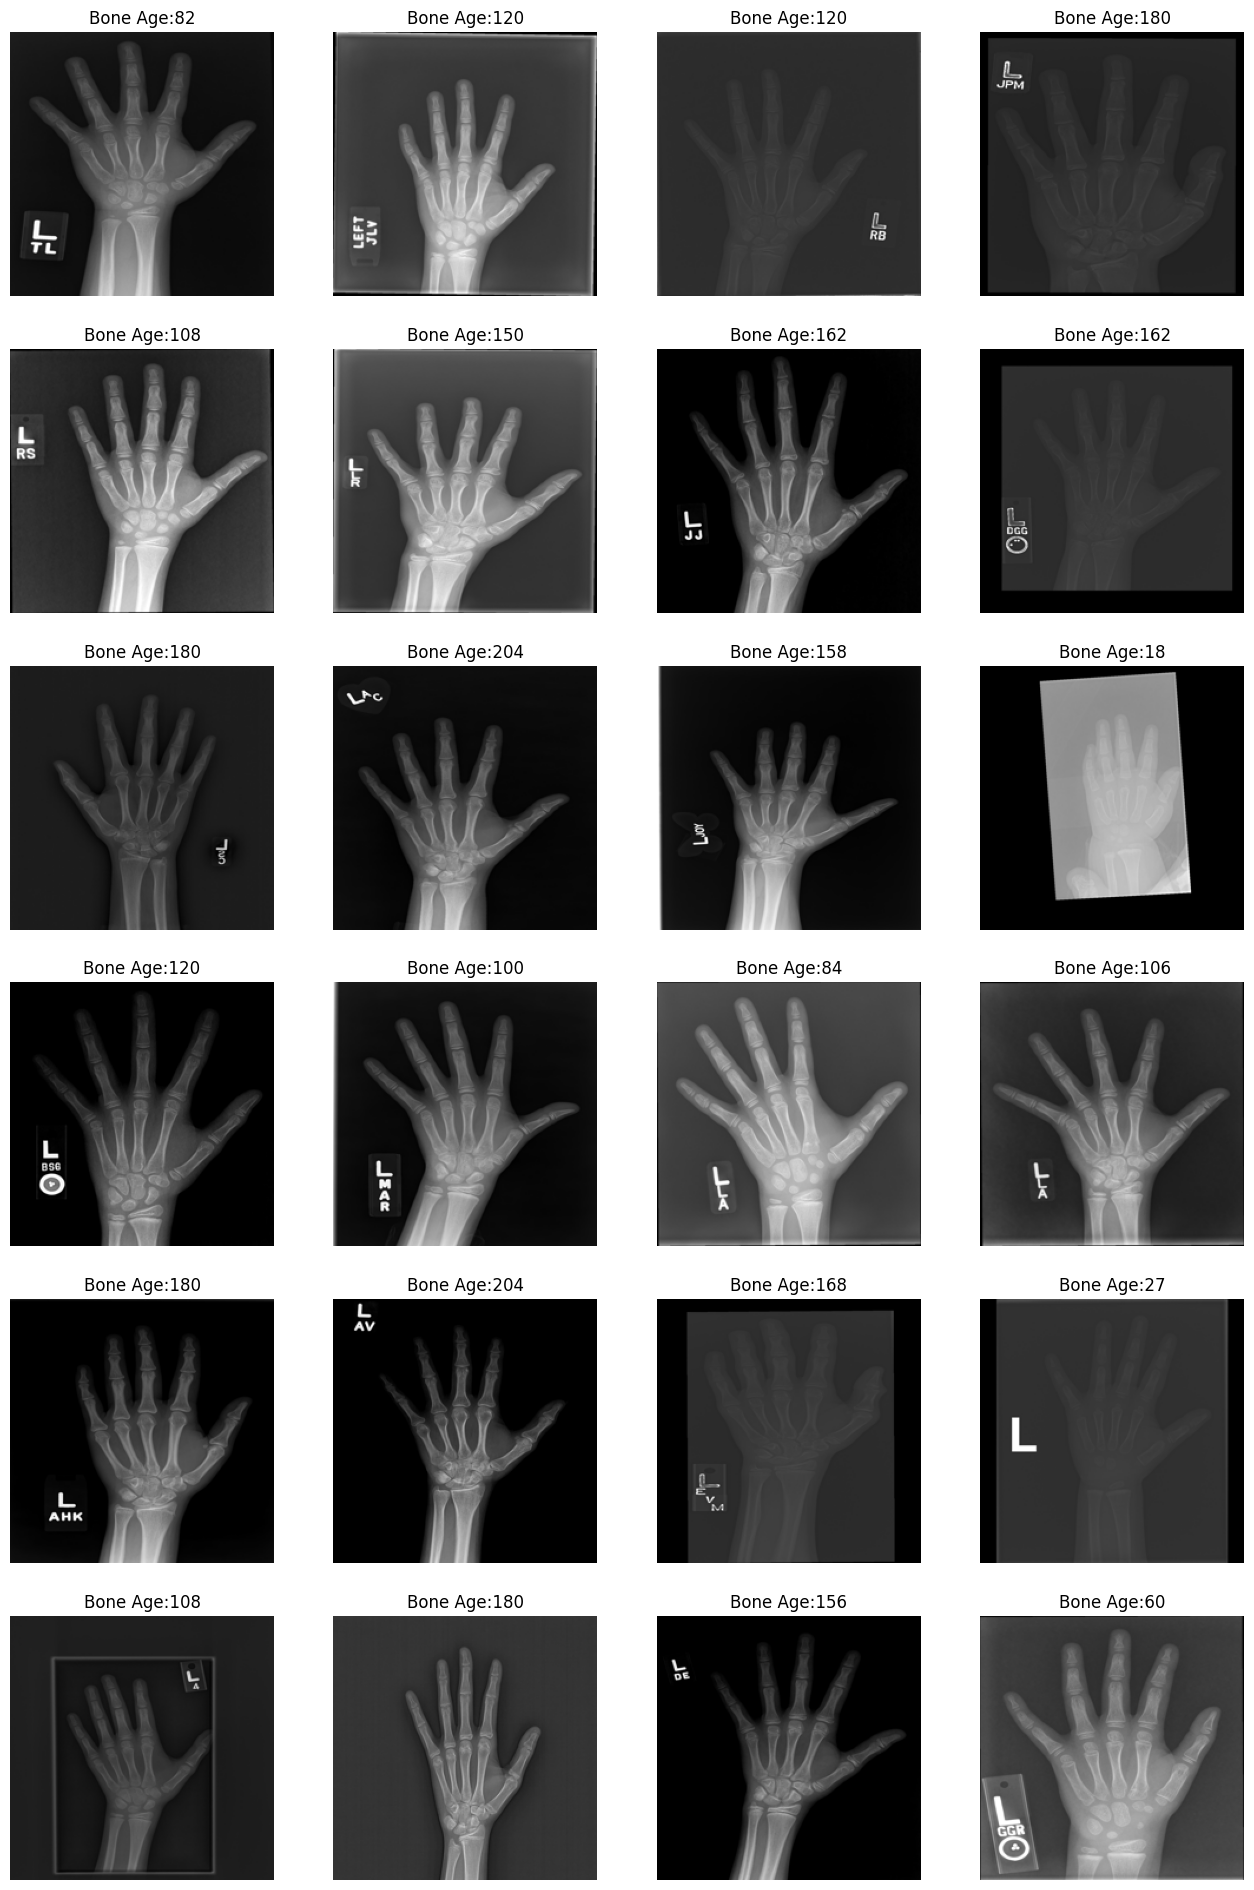

In [ ]:
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Bone Age:{y_train[i]}")
    plt.axis("off")

**CNN Model:**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=1000, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=800, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="linear"))

model.compile(optimizer="adam",loss="mean_squared_error",
             metrics=["mse"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 96)       0

In [ ]:
history = model.fit(x_train, y_train, batch_size=64,
          epochs=5, validation_data=(x_ts,y_ts))

Epoch 1/5
78/78 [==============================] - 799s 10s/step - loss: 153023.4219 - mse: 153023.4219 - val_loss: 2301.5293 - val_mse: 2301.5293
Epoch 2/5
78/78 [==============================] - 787s 10s/step - loss: 2333.7288 - mse: 2333.7288 - val_loss: 1911.0973 - val_mse: 1911.0973
Epoch 3/5
78/78 [==============================] - 805s 10s/step - loss: 1672.9490 - mse: 1672.9490 - val_loss: 1703.0607 - val_mse: 1703.0607
Epoch 4/5
78/78 [==============================] - 813s 10s/step - loss: 1351.5736 - mse: 1351.5736 - val_loss: 1617.7417 - val_mse: 1617.7417
Epoch 5/5
78/78 [==============================] - 780s 10s/step - loss: 1150.0472 - mse: 1150.0472 - val_loss: 1602.3813 - val_mse: 1602.3813


In [ ]:
model.save('CNN_Regression_1.h5')

In [ ]:
model.save_weights('weights_CNN_Regression_1.h5')

In [ ]:
loss, mse = model.evaluate(x_ts,y_ts)
print("MSE for Test Data:",mse)
print()
loss, mse = model.evaluate(x_train,y_train)
print("MSE for Train Data:",mse)

13/13 [==============================] - 15s 1s/step - loss: 1602.3813 - mse: 1602.3813
MSE for Test Data: 1602.38134765625

156/156 [==============================] - 200s 1s/step - loss: 851.3004 - mse: 851.3004
MSE for Train Data: 851.3004150390625


In [ ]:
y_pred = model.predict(x_test)

156/156 [==============================] - 236s 2s/step


In [ ]:
y_pred[:10]

array([[ 99.967476],
       [123.36769 ],
       [ 99.77938 ],
       [113.99474 ],
       [133.18576 ],
       [162.6149  ],
       [131.99632 ],
       [132.03539 ],
       [ 64.970566],
       [ 59.29209 ]], dtype=float32)

In [ ]:
y_test[:10]

array([ 84,  84,  60, 156, 156, 180, 144, 156,  30, 132])

In [ ]:
from sklearn.metrics import r2_score

test_score = r2_score(y_test, y_pred)
print("Test R2 Score:",test_score)

Test R2 Score: 0.06694382675246313


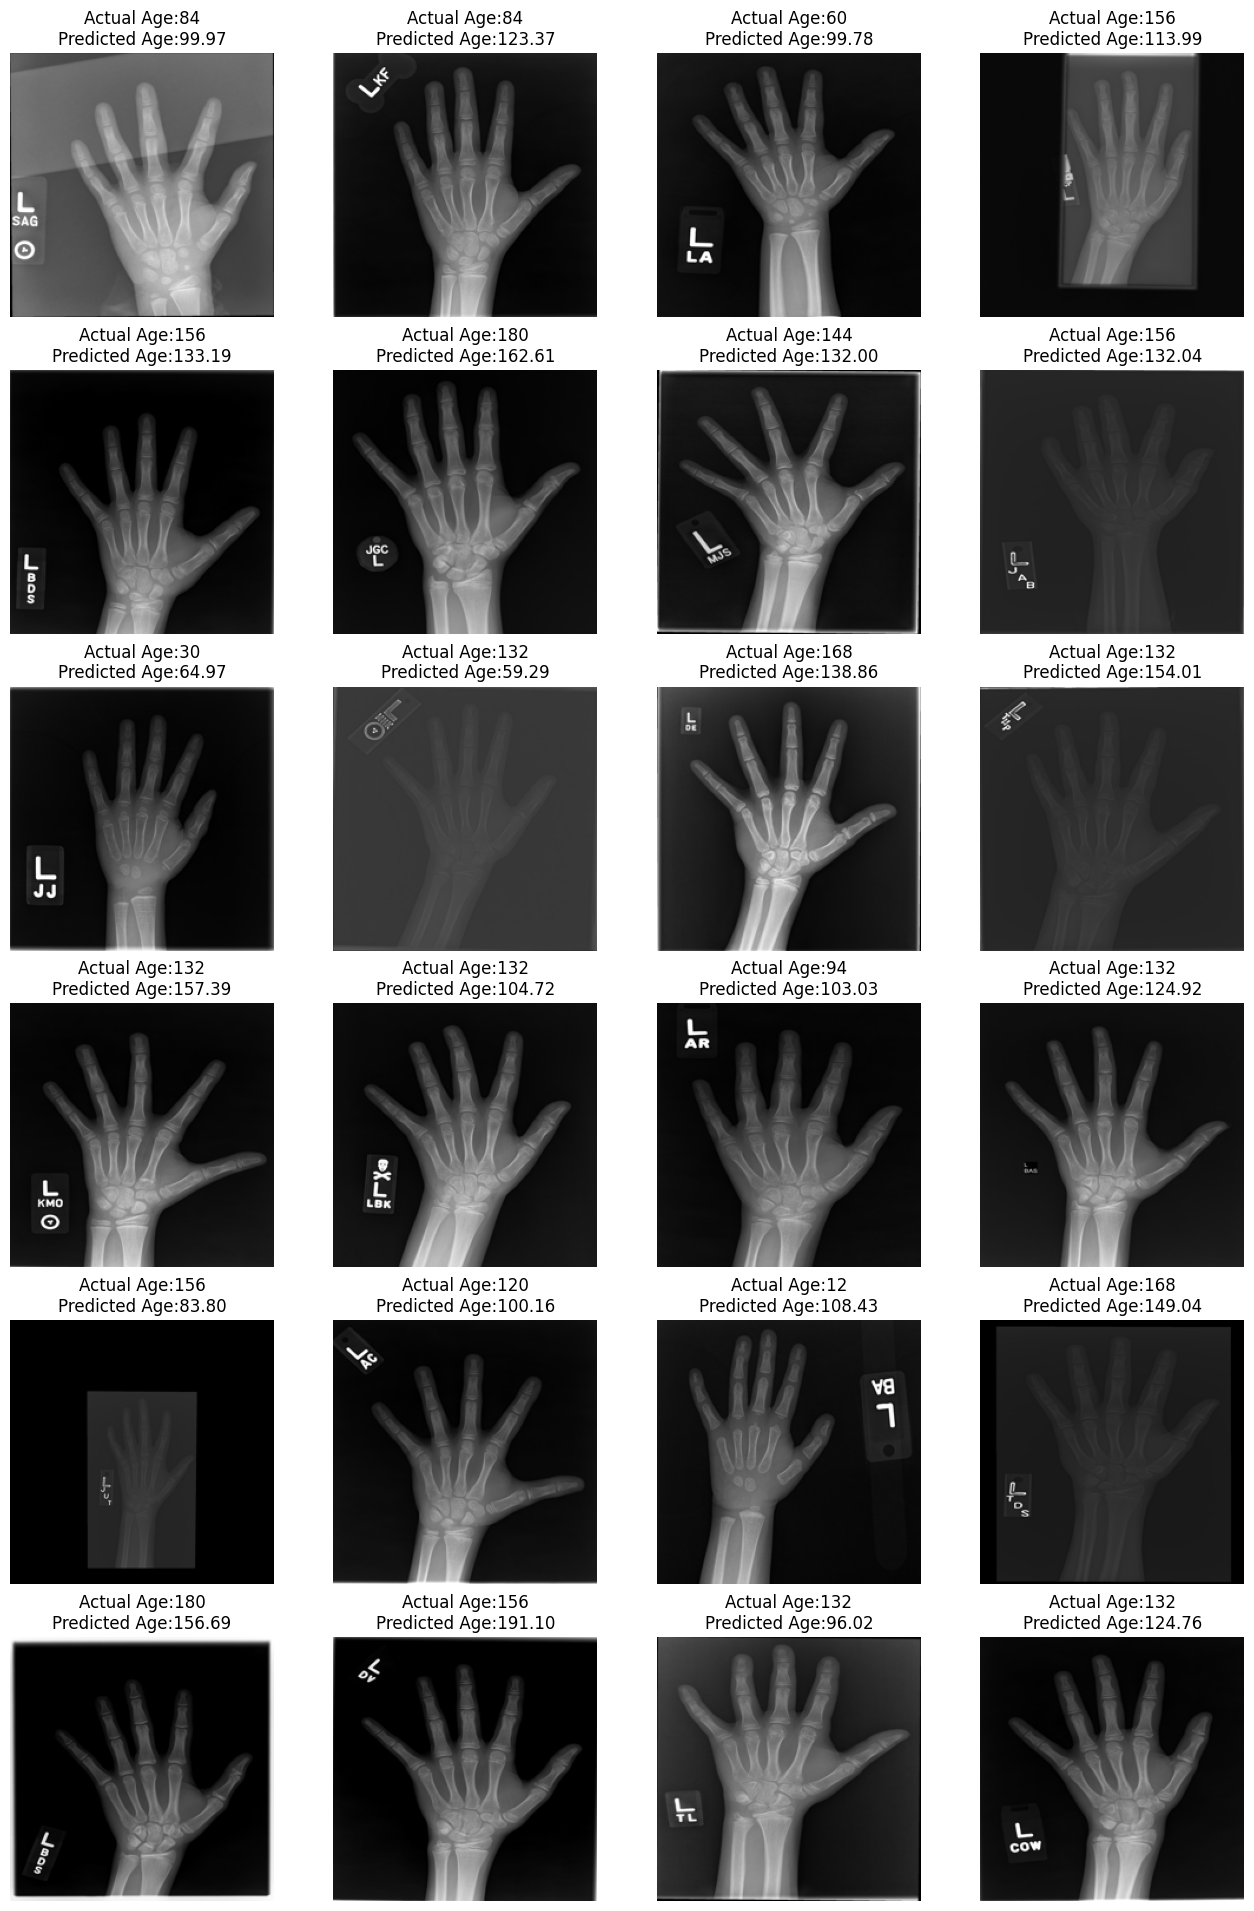

In [ ]:
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual Age:{y_test[i]}\nPredicted Age:{y_pred[i][0]:.2f}")
    plt.axis("off")

**MobileNet V2:**

In [ ]:
path ="https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/5"

In [ ]:
pretrained_model = hub.KerasLayer(path, input_shape=(224,224,3), trainable=False)


pre_model = Sequential()
pre_model.add(pretrained_model)
pre_model.add(Dense(units=1 ,activation="linear"))

pre_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1024)              3228864   
                                                                 
 dense_4 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 1,025
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
pre_model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mse"])

In [ ]:
history_1 = pre_model.fit(x_train, y_train,
          batch_size=64, epochs=15, validation_data = (x_ts,y_ts))

Epoch 1/15
78/78 [==============================] - 307s 4s/step - loss: 13157.1299 - mse: 13157.1299 - val_loss: 9176.3623 - val_mse: 9176.3623
Epoch 2/15
78/78 [==============================] - 280s 4s/step - loss: 6700.1025 - mse: 6700.1025 - val_loss: 4695.6050 - val_mse: 4695.6050
Epoch 3/15
78/78 [==============================] - 289s 4s/step - loss: 3645.6550 - mse: 3645.6550 - val_loss: 2765.2253 - val_mse: 2765.2253
Epoch 4/15
78/78 [==============================] - 279s 4s/step - loss: 2452.7263 - mse: 2452.7263 - val_loss: 2093.4775 - val_mse: 2093.4775
Epoch 5/15
78/78 [==============================] - 281s 4s/step - loss: 2067.1326 - mse: 2067.1326 - val_loss: 1886.7004 - val_mse: 1886.7004
Epoch 6/15
78/78 [==============================] - 282s 4s/step - loss: 1945.8389 - mse: 1945.8389 - val_loss: 1813.8521 - val_mse: 1813.8521
Epoch 7/15
78/78 [==============================] - 281s 4s/step - loss: 1897.8035 - mse: 1897.8035 - val_loss: 1776.6987 - val_mse: 1776.69

In [ ]:
pre_model.save('MobileNet_model_1.h5')

In [ ]:
pre_model.save_weights('weights_MobileNet_model_1.h5')

In [ ]:
loss, mse = pre_model.evaluate(x_test,y_test)
print("MSE for Test Data:",mse)
print()
loss, mse = pre_model.evaluate(x_train,y_train)
print("MSE for Train Data:",mse)

156/156 [==============================] - 251s 2s/step - loss: 1648.3612 - mse: 1648.3612
MSE for Test Data: 1648.3612060546875

156/156 [==============================] - 237s 2s/step - loss: 1705.1068 - mse: 1705.1068
MSE for Train Data: 1705.1068115234375


In [ ]:
y_pred_1 = pre_model.predict(x_test)

156/156 [==============================] - 276s 2s/step


In [ ]:
y_pred_1[:10]

array([[118.473015],
       [134.15411 ],
       [121.21108 ],
       [125.539024],
       [145.20912 ],
       [125.43838 ],
       [119.21557 ],
       [121.94412 ],
       [132.6969  ],
       [122.512115]], dtype=float32)

In [ ]:
y_test[:10]

array([ 84,  84,  60, 156, 156, 180, 144, 156,  30, 132])

In [ ]:
print("R2 Score on test Data:",r2_score(y_test,y_pred_1))

R2 Score on test Data: 0.02677499698376995


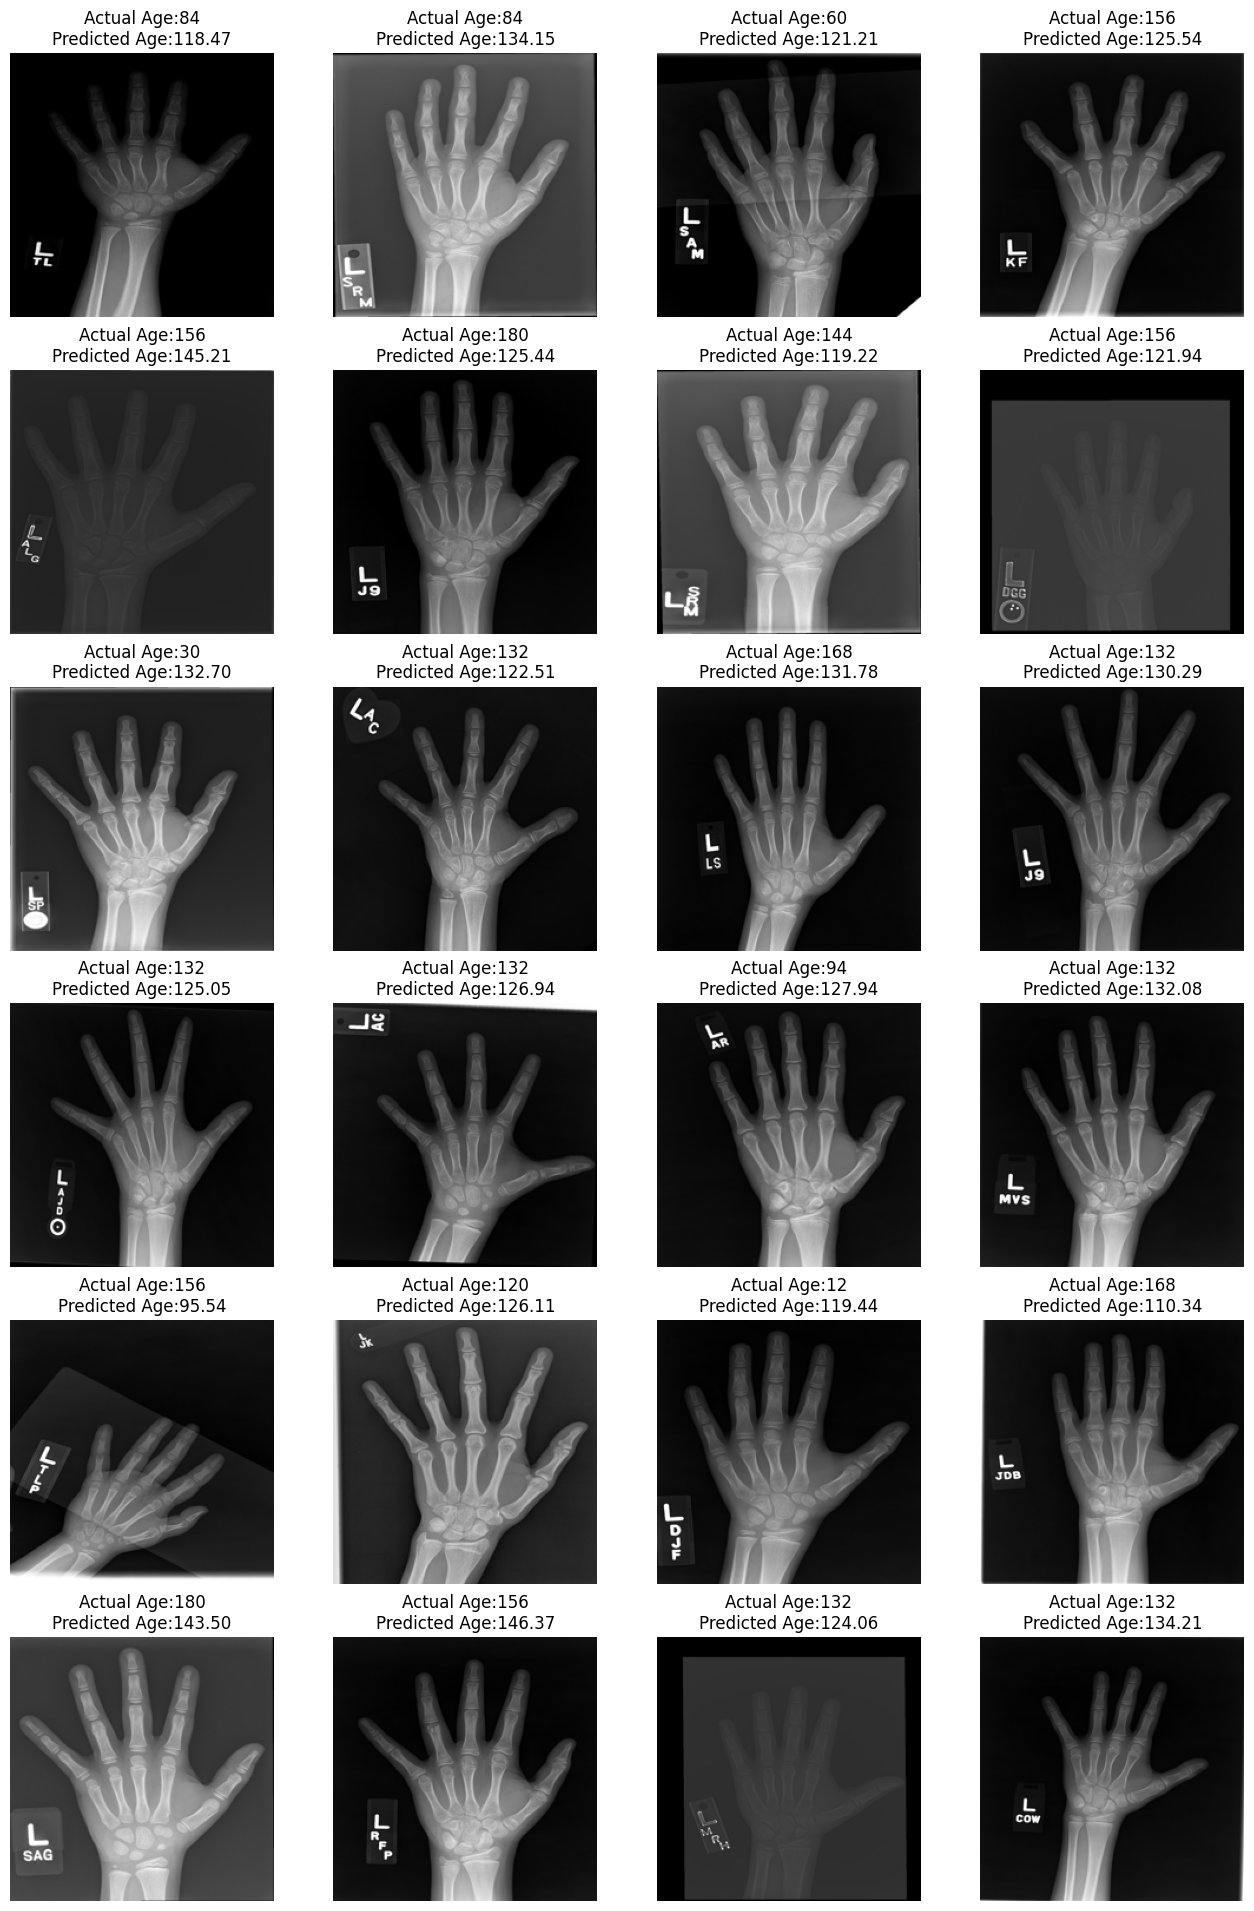

In [ ]:
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Age:{y_test[i]}\nPredicted Age:{y_pred_1[i][0]:.2f}")
    plt.axis("off")

**RestNet:**

In [ ]:
path2 = "https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/5"

pretrained_model_2 = hub.KerasLayer(path2, input_shape=(224,224,3), trainable=False)


res_model = Sequential()
res_model.add(pretrained_model_2)
res_model.add(Dense(units=1 ,activation="linear"))

res_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              58295232  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 58297281 (222.39 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 58295232 (222.38 MB)
_________________________________________________________________


In [ ]:
res_model.compile(optimizer="adam",
               loss="mean_squared_error",
               metrics=["mse"])

In [ ]:
history_3 = res_model.fit(x_train, y_train,
           batch_size=64, epochs=5, validation_data = (x_ts,y_ts))

Epoch 1/5
78/78 [==============================] - 2634s 33s/step - loss: 7353.4092 - mse: 7353.4092 - val_loss: 3203.8545 - val_mse: 3203.8545
Epoch 2/5
78/78 [==============================] - 2592s 33s/step - loss: 3139.5176 - mse: 3139.5176 - val_loss: 3032.5547 - val_mse: 3032.5547
Epoch 3/5
78/78 [==============================] - 2565s 33s/step - loss: 3011.6047 - mse: 3011.6047 - val_loss: 3035.7676 - val_mse: 3035.7676
Epoch 4/5
78/78 [==============================] - 2553s 33s/step - loss: 2931.3901 - mse: 2931.3901 - val_loss: 2760.3447 - val_mse: 2760.3447
Epoch 5/5
78/78 [==============================] - 2555s 33s/step - loss: 2755.6819 - mse: 2755.6819 - val_loss: 2588.7334 - val_mse: 2588.7334


In [ ]:
res_model.save('ResNet_regression.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
res_model.save_weights('weights_ResNet_regression.h5')

In [ ]:
model_3 = tf.keras.models.load_model("ResNet_regression.h5")

In [ ]:
loss, mse = res_model.evaluate(x_test,y_test)
print("MSE for Test Data:",mse)
print()
loss, mse = res_model.evaluate(x_train,y_train)
print("MSE for Train Data:",mse)

156/156 [==============================] - 2486s 16s/step - loss: 2657.9534 - mse: 2657.9534
MSE for Test Data: 2657.953369140625

156/156 [==============================] - 2259s 14s/step - loss: 2675.1670 - mse: 2675.1670
MSE for Train Data: 2675.1669921875


In [ ]:
y_pred_2 = res_model.predict(x_test)

156/156 [==============================] - 2316s 15s/step


In [ ]:
y_pred_2[:10]

array([[121.16118 ],
       [ 72.65793 ],
       [ 44.654236],
       [127.786026],
       [ 83.91138 ],
       [130.20406 ],
       [ 89.5282  ],
       [146.0836  ],
       [130.63942 ],
       [139.18631 ]], dtype=float32)

In [ ]:
y_test[:10]

array([ 60, 165, 192, 192, 192,  37,  24,  94, 132, 113])

In [ ]:
print("R2 Score on test Data:",r2_score(y_test,y_pred_2))

R2 Score on test Data: -0.5500908210972602


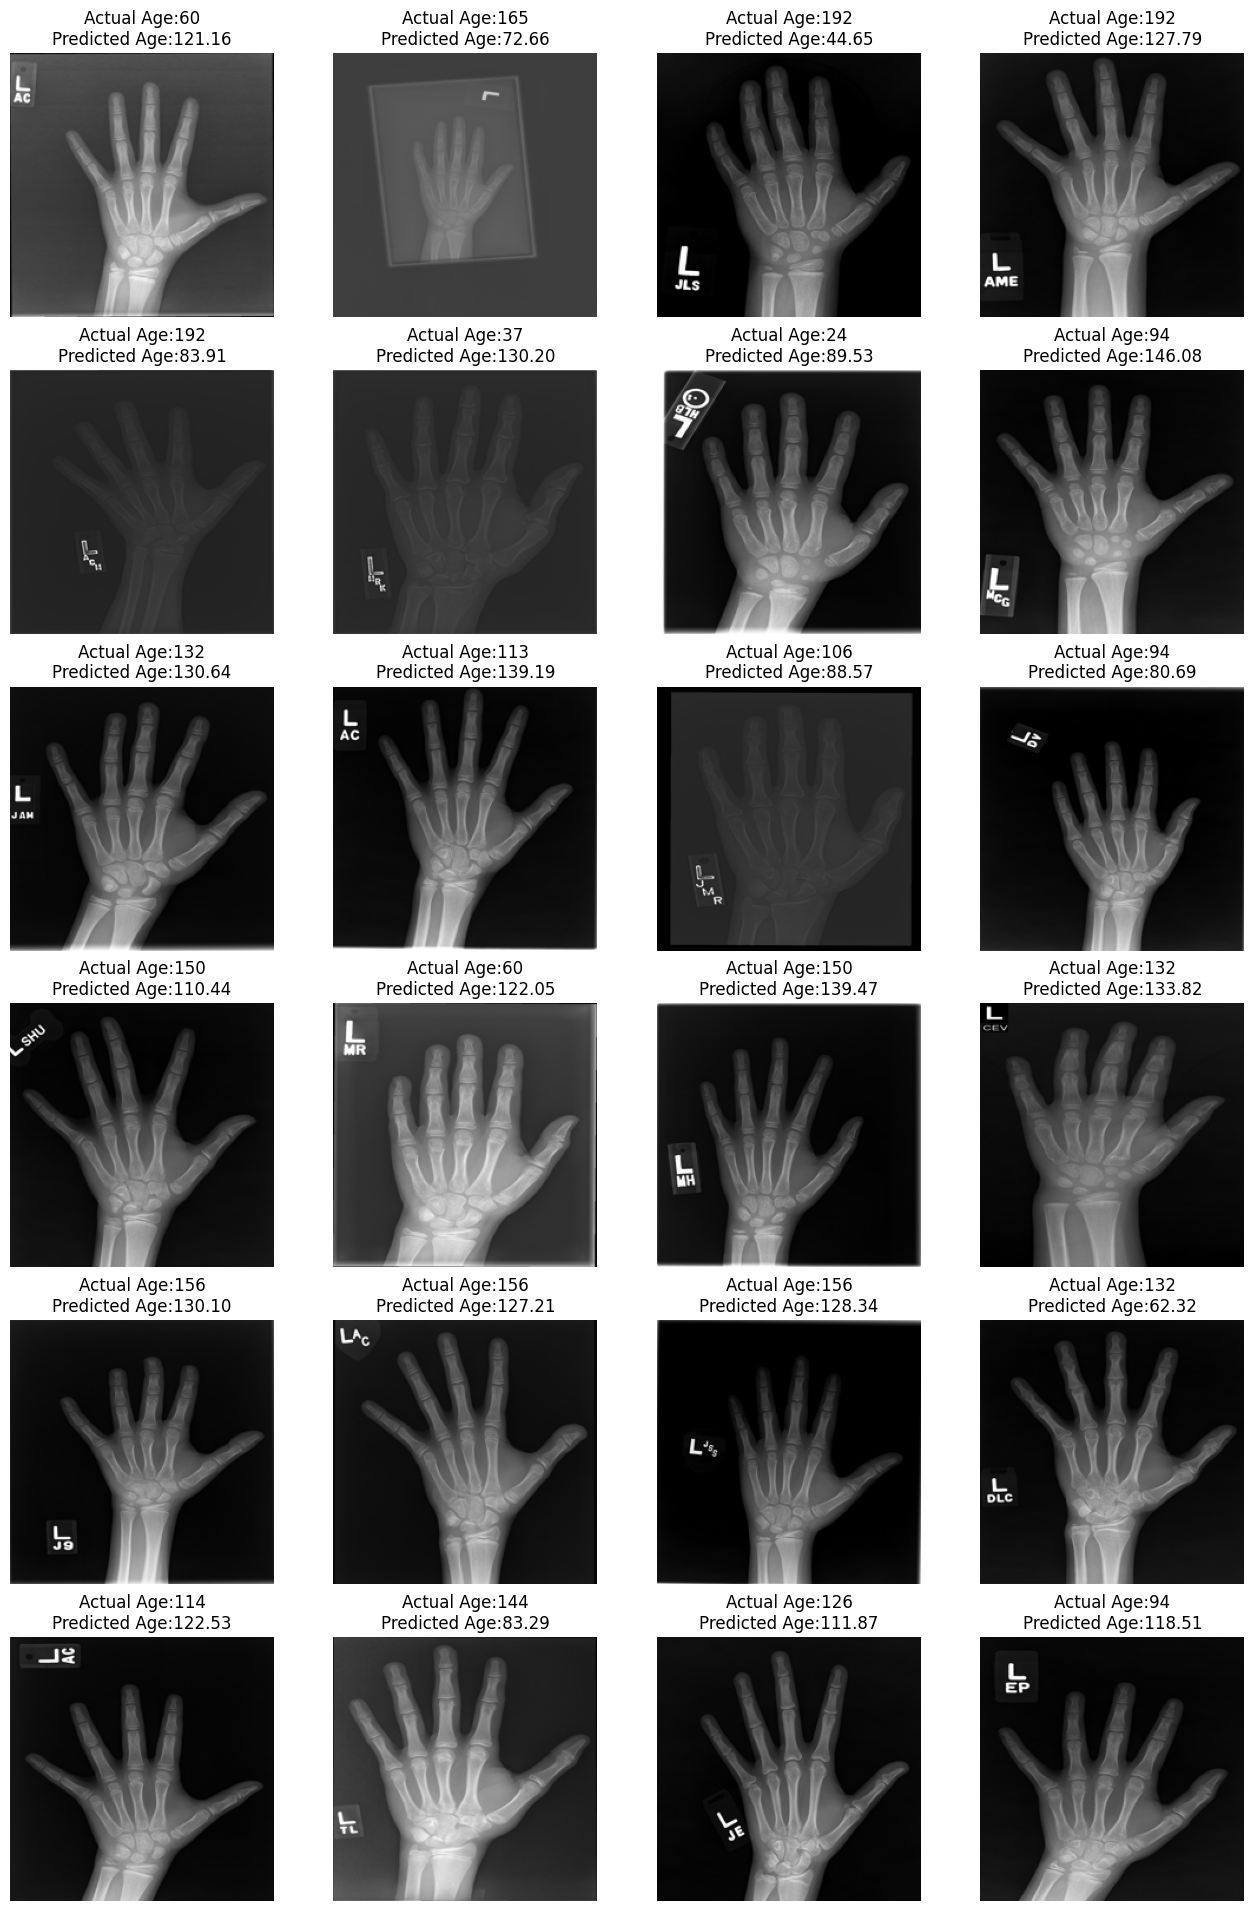

In [ ]:
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Age:{y_test[i]}\nPredicted Age:{y_pred_2[i][0]:.2f}")
    plt.axis("off")

**VGG-19 Model:**

In [ ]:
age_data = []

for img in boneage_df_6['Image Path']:
    image = Image.open("/content/drive/MyDrive/boneage-dataset/"+img)
    image = image.resize((32,32))
    image = image.convert("RGB")
    image = np.array(image)
    age_data.append(image)

print(len(age_data))

9981


In [ ]:
x_2 = np.array(age_data)
y_2 = boneage_df_6['boneage'].values

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_2,y_2,test_size=0.50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4990, 32, 32, 3)
(4991, 32, 32, 3)
(4990,)
(4991,)


In [ ]:
x_test_2, x_val,y_test_2,y_val = train_test_split(x_test,y_test,test_size=0.50)
print(x_test_2.shape)
print(x_val.shape)
print(y_test_2.shape)
print(y_val.shape)

(2495, 32, 32, 3)
(2496, 32, 32, 3)
(2495,)
(2496,)


In [ ]:
#x_tr = x_train[:3000]
x_ts = x_test_2[:400]

#y_tr = y_train[:3000]
y_ts = y_test_2[:400]

In [ ]:
train_vgg19 = tf.keras.applications.vgg19.preprocess_input(x_train)
val_vgg19 = tf.keras.applications.vgg19.preprocess_input(x_val)
test_vgg19 = tf.keras.applications.vgg19.preprocess_input(x_test_2)


In [ ]:
def process_images_vgg19(image, label = None):
    image = image/255
    #image = np.expand_dims(image, axis=0)
    #image = tf.image.resize(image, (224,224))
    return image, label

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  shear_range=0.1,
                                                                  #zoom_range=0.1,
                                                                  horizontal_flip=True,
                                                                  #vertical_flip=True,
                                                                  rotation_range = 2
                                                                 )


In [ ]:
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  shear_range=0.1,
                                                                  #zoom_range=0.1,
                                                                  horizontal_flip=True,
                                                                  #vertical_flip=True,
                                                                  rotation_range = 2
                                                                 )

In [ ]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
def VGG19_model():

    VGG19_model = Sequential()

    pretrained_model = tf.keras.applications.VGG19(include_top = False,
                                                   weights = "imagenet",
                                                   #input_shape=(224,224,3),
                                                   pooling = 'avg',
                                                   input_shape = (32,32,3)
                                                   )
    for layer in pretrained_model.layers:
        layer.trainable = False

    VGG19_model.add(pretrained_model)
    VGG19_model.add(Flatten())
    VGG19_model.add( Dense(units = 1, activation = 'linear'))

    VGG19_model.compile(loss = "mean_squared_error",
                            optimizer = 'Adam',
                            metrics = ["mse"])

    return VGG19_model

In [ ]:
train_vgg19.shape[0]//100

49

In [ ]:
VGG19_model = VGG19_model()
VGG19_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 20024897 (76.39 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback
                ):
    # Define the correct function signature for on_epoch_end
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') == 0.95:
            print("\nReached 95% Training Accuracy so cancelling training!")

            # Stop training once the above condition is met
            self.model.stop_training = True

callback = myCallback()
earlystopping = EarlyStopping(patience = 10, start_from_epoch = 10)
reduce_lr = ReduceLROnPlateau(patience = 3, cooldown = 5)

In [ ]:
VGG19_model_history = VGG19_model.fit(x_train, y_train,
                                      validation_data = (x_ts,y_ts),
                                      epochs = 20,
                                      verbose = 1,
                                      callbacks = [earlystopping, callback])

Epoch 1/20
156/156 [==============================] - 97s 617ms/step - loss: 7034.9941 - mse: 7034.9941 - val_loss: 3618.5852 - val_mse: 3618.5852
Epoch 2/20
156/156 [==============================] - 97s 624ms/step - loss: 3217.5332 - mse: 3217.5332 - val_loss: 3281.4221 - val_mse: 3281.4221
Epoch 3/20
156/156 [==============================] - 94s 599ms/step - loss: 3006.3123 - mse: 3006.3123 - val_loss: 3069.8269 - val_mse: 3069.8269
Epoch 4/20
156/156 [==============================] - 92s 590ms/step - loss: 2846.1470 - mse: 2846.1470 - val_loss: 2903.0476 - val_mse: 2903.0476
Epoch 5/20
156/156 [==============================] - 92s 589ms/step - loss: 2712.5757 - mse: 2712.5757 - val_loss: 2781.6016 - val_mse: 2781.6016
Epoch 6/20
156/156 [==============================] - 88s 566ms/step - loss: 2606.6533 - mse: 2606.6533 - val_loss: 2657.9282 - val_mse: 2657.9282
Epoch 7/20
156/156 [==============================] - 95s 609ms/step - loss: 2516.1611 - mse: 2516.1611 - val_loss: 25

In [ ]:
VGG19_model.save('VGG19_regression.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
VGG19_model.save_weights('weights_VGG19_regression.h5')

In [ ]:
loss, mse = VGG19_model.evaluate(x_test_2,y_test_2)
print("MSE for Test Data:",mse)
print()
loss, mse = VGG19_model.evaluate(x_train,y_train)
print("MSE for Train Data:",mse)

78/78 [==============================] - 46s 580ms/step - loss: 1977.4688 - mse: 1977.4688
MSE for Test Data: 1977.46875

156/156 [==============================] - 82s 527ms/step - loss: 1958.1221 - mse: 1958.1221
MSE for Train Data: 1958.1220703125


In [ ]:
y_pred_3 = VGG19_model.predict(x_test_2)

78/78 [==============================] - 43s 552ms/step


In [ ]:
y_pred_3[:10]

array([[126.37237 ],
       [129.89508 ],
       [ 61.74153 ],
       [ 92.970825],
       [139.13019 ],
       [125.460396],
       [101.103355],
       [111.33879 ],
       [ 87.7238  ],
       [ 73.7763  ]], dtype=float32)

In [ ]:
y_test_2[:10]

array([168,  94, 156, 137, 100,  94, 150,  94, 156,  84])

In [ ]:
print("R2 Score on test Data:",r2_score(y_test_2,y_pred_3))

R2 Score on test Data: -0.13478026366287565


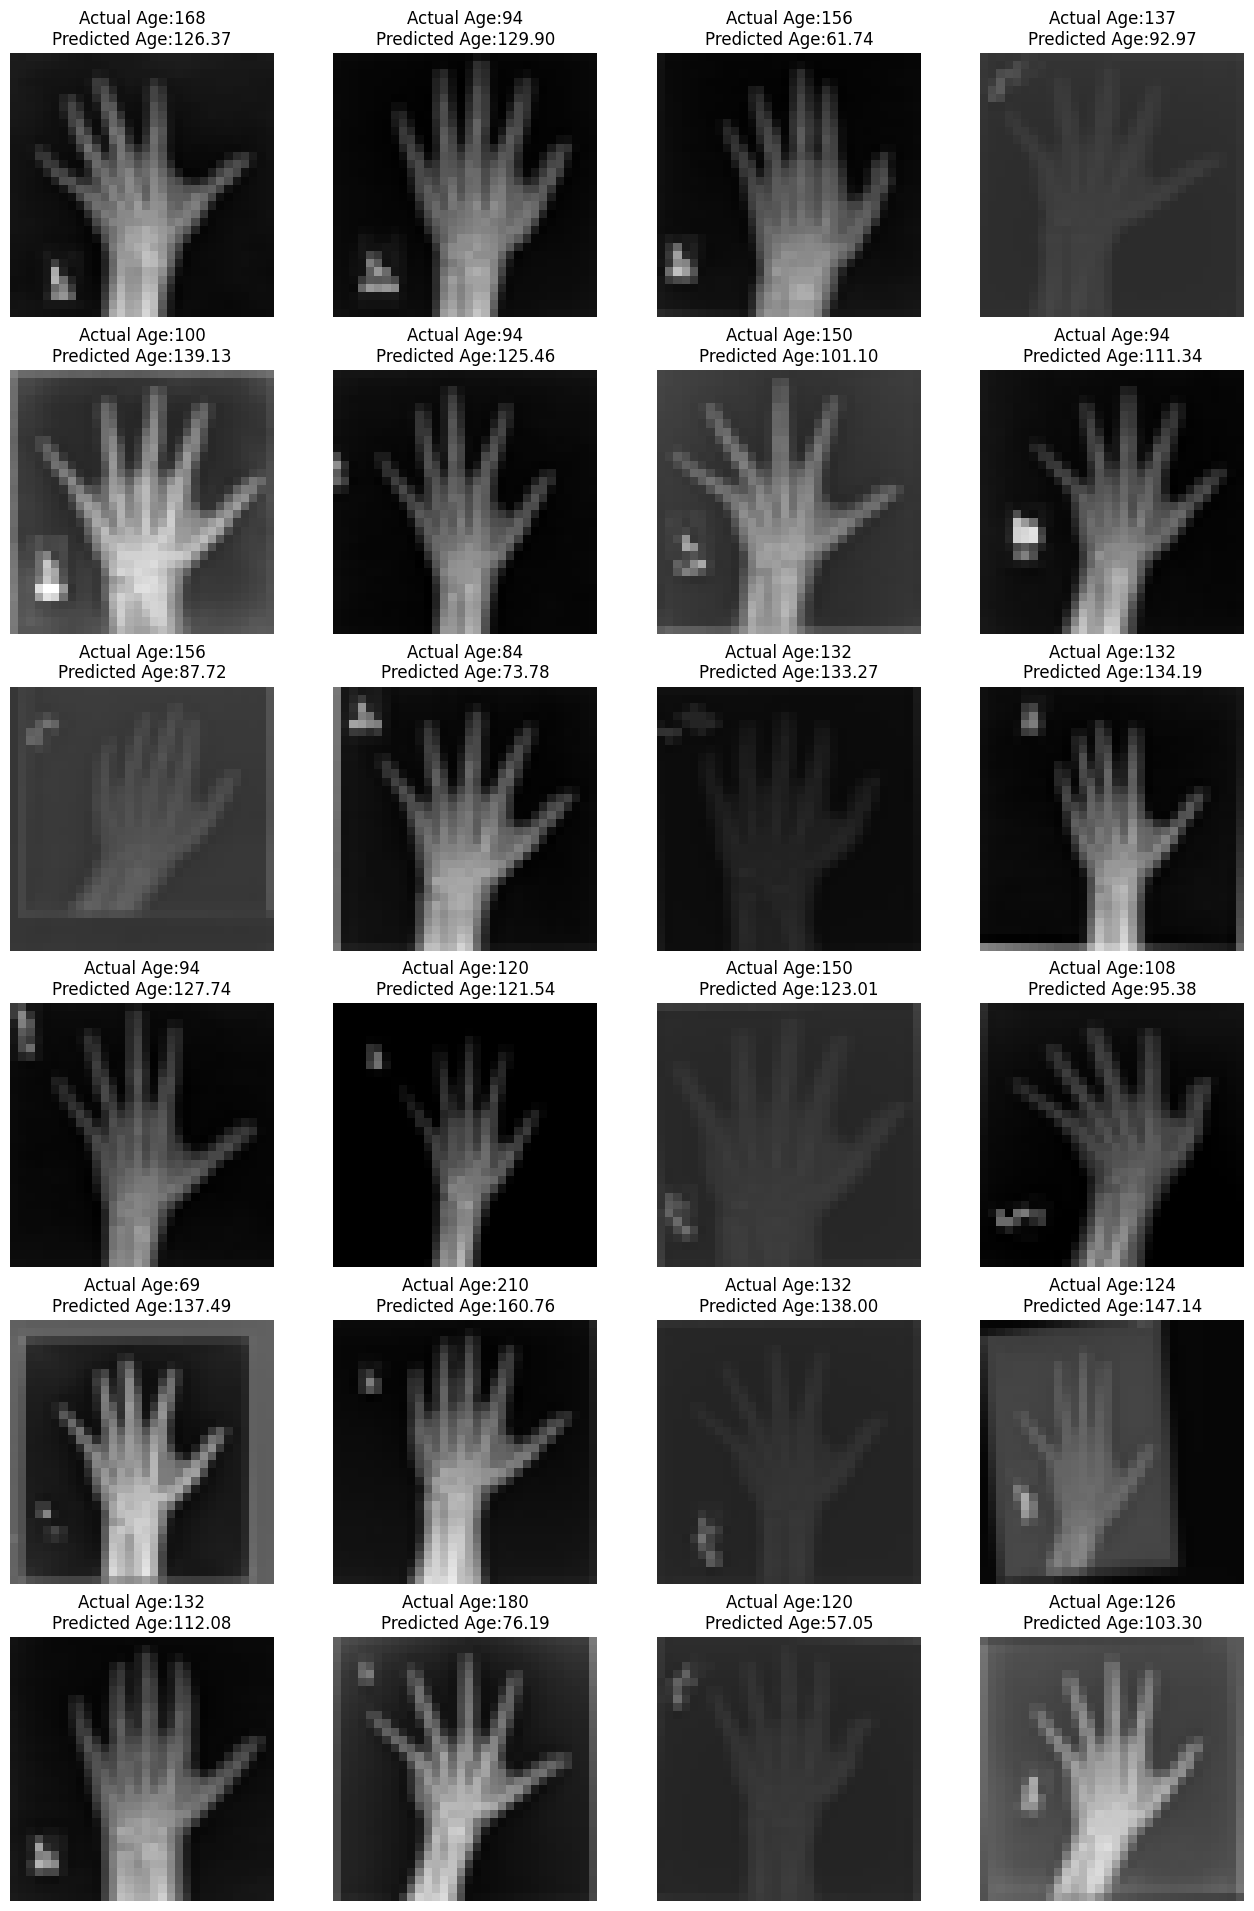

In [ ]:
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Age:{y_test_2[i]}\nPredicted Age:{y_pred_3[i][0]:.2f}")
    plt.axis("off")